**LO2**

DATASET

In [32]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/GOOGLE.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,open,high,low,close,volume
0,8/19/2004,2.4908,2.5917,2.3900,2.4989,22245987
1,8/20/2004,2.5274,2.7167,2.5030,2.6975,11374427
2,8/23/2004,2.7605,2.8262,2.7159,2.7246,9093652
3,8/24/2004,2.7719,2.7794,2.5794,2.6118,7594923
4,8/25/2004,2.6140,2.6897,2.5871,2.6399,4576852
...,...,...,...,...,...,...
5220,5/19/2025,164.5100,166.6400,164.2200,166.5400,30426100
5221,5/20/2025,166.4300,168.5000,162.9000,163.9800,46607660
5222,5/21/2025,163.6900,173.1400,163.5600,168.5600,73415961
5223,5/22/2025,171.8500,176.7700,170.7100,170.8700,74864418


In [33]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,open,high,low,close,volume
date,,,,,
2004-08-19,2.4908,2.5917,2.3900,2.4989,22245987
2004-08-20,2.5274,2.7167,2.5030,2.6975,11374427
2004-08-23,2.7605,2.8262,2.7159,2.7246,9093652
2004-08-24,2.7719,2.7794,2.5794,2.6118,7594923
2004-08-25,2.6140,2.6897,2.5871,2.6399,4576852
...,...,...,...,...,...
2025-05-19,164.5100,166.6400,164.2200,166.5400,30426100
2025-05-20,166.4300,168.5000,162.9000,163.9800,46607660
2025-05-21,163.6900,173.1400,163.5600,168.5600,73415961


In [34]:
# prompt: i want ti have the column that has tomorrows values

# Add a new column 'Tomorrow' that contains the 'Close' price of the next day
df['tomorrow'] = df['close'].shift(-1)
df

,open,high,low,close,volume,tomorrow
date,,,,,,
2004-08-19,2.4908,2.5917,2.3900,2.4989,22245987,2.6975
2004-08-20,2.5274,2.7167,2.5030,2.6975,11374427,2.7246
2004-08-23,2.7605,2.8262,2.7159,2.7246,9093652,2.6118
2004-08-24,2.7719,2.7794,2.5794,2.6118,7594923,2.6399
2004-08-25,2.6140,2.6897,2.5871,2.6399,4576852,2.6875
...,...,...,...,...,...,...
2025-05-19,164.5100,166.6400,164.2200,166.5400,30426100,163.9800
2025-05-20,166.4300,168.5000,162.9000,163.9800,46607660,168.5600
2025-05-21,163.6900,173.1400,163.5600,168.5600,73415961,170.8700


In [35]:
# prompt: i need another column that showing tomorrows price is grater than or lower than todays price, use boolean and if it grater use 0 , if it not use 1
df['target'] = (df['tomorrow'] > df['close']).astype(int)
df

,open,high,low,close,volume,tomorrow,target
date,,,,,,,
2004-08-19,2.4908,2.5917,2.3900,2.4989,22245987,2.6975,1
2004-08-20,2.5274,2.7167,2.5030,2.6975,11374427,2.7246,1
2004-08-23,2.7605,2.8262,2.7159,2.7246,9093652,2.6118,0
2004-08-24,2.7719,2.7794,2.5794,2.6118,7594923,2.6399,1
2004-08-25,2.6140,2.6897,2.5871,2.6399,4576852,2.6875,1
...,...,...,...,...,...,...,...
2025-05-19,164.5100,166.6400,164.2200,166.5400,30426100,163.9800,0
2025-05-20,166.4300,168.5000,162.9000,163.9800,46607660,168.5600,1
2025-05-21,163.6900,173.1400,163.5600,168.5600,73415961,170.8700,1


In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = df.iloc[:-100]
test = df.iloc[-100:]
predictors = ['close','open', 'high', 'low', 'volume']
model.fit(train[predictors], train['target'])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [38]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [39]:
preds = pd.Series(preds, index=test.index)
preds

,0
date,
2024-12-30,0
2024-12-31,0
2025-01-02,0
2025-01-03,0
2025-01-06,0
...,...
2025-05-19,1
2025-05-20,1
2025-05-21,1


In [40]:
precision_score(test['target'], preds)

0.48484848484848486

<Axes: xlabel='date'>

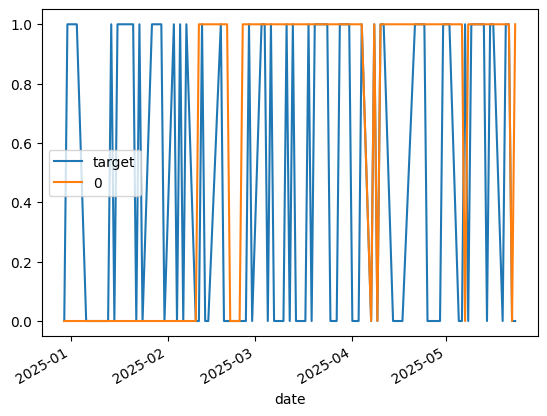

In [41]:
combined = pd.concat([test['target'], preds], axis=1)
combined.plot()

In [42]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [43]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [44]:
predictions = backtest(df, model, predictors)

In [45]:
predictions['Predictions'].value_counts()

,count
Predictions,
1,1465
0,1260


In [46]:
precision_score(predictions['target'], predictions['Predictions'])

0.5249146757679181

In [47]:
predictions['target'].value_counts() / predictions.shape[0]

,count
target,
1,0.533945
0,0.466055


In [48]:
horizons = [2,5,60,250,1000]
new_predictors = []
for horizon in horizons:
        rolling_averages = df.rolling(horizon).mean()
        ratio_column = f'close_ratio_{horizon}'
        df[ratio_column] = df['close'] / rolling_averages['close']
        trend_column = f'trend_{horizon}'
        df[trend_column] = df.shift(1).rolling(horizon).sum()['target']
        new_predictors += [ratio_column, trend_column]
df = df.dropna()
df


,open,high,low,close,volume,tomorrow,target,close_ratio_2,trend_2,close_ratio_5,trend_5,close_ratio_60,trend_60,close_ratio_250,trend_250,close_ratio_1000,trend_1000
date,,,,,,,,,,,,,,,,,
2008-08-08,11.9582,12.3468,11.8471,12.3283,3721641,12.4735,1,1.016310,1.0,1.029844,3.0,0.927170,24.0,0.879917,121.0,1.227876,519.0
2008-08-11,12.2651,12.6737,12.2479,12.4735,4221192,12.5176,1,1.005854,2.0,1.025823,4.0,0.940443,24.0,0.890330,122.0,1.241130,519.0
2008-08-12,12.5024,12.6053,12.4028,12.5176,2742643,12.4533,0,1.001765,2.0,1.019940,4.0,0.946062,25.0,0.893445,123.0,1.244305,519.0
2008-08-13,12.4924,12.5407,12.3001,12.4533,3608792,12.5893,1,0.997425,1.0,1.009095,3.0,0.943496,25.0,0.888802,123.0,1.236703,519.0
2008-08-14,12.3953,12.6421,12.3602,12.5893,2905052,12.7054,1,1.005431,1.0,1.009373,4.0,0.955997,25.0,0.898474,123.0,1.248975,519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-16,167.7250,169.3500,165.6200,166.1900,42846930,166.5400,1,1.006755,1.0,1.021438,4.0,1.029397,28.0,0.965613,135.0,1.218738,530.0
2025-05-19,164.5100,166.6400,164.2200,166.5400,30426100,163.9800,0,1.001052,2.0,1.013523,4.0,1.032942,29.0,0.967842,135.0,1.220866,530.0
2025-05-20,166.4300,168.5000,162.9000,163.9800,46607660,168.5600,1,0.992255,1.0,0.992567,3.0,1.018650,29.0,0.953232,134.0,1.201698,529.0


In [49]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=5, random_state=1)


In [50]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [51]:
predictions = backtest(df, model, new_predictors)

In [52]:
predictions['Predictions'].value_counts()

,count
Predictions,
0.0,1494
1.0,230


In [53]:
precision_score(predictions['target'], predictions['Predictions'])

0.5565217391304348

**LO3**

Correlation Coefficient: 0.60

DataFrame with Descriptive Analytics Columns:
             close    volume  50_day_MA  200_day_MA  volume_spike  volatility
date                                                                         
2025-05-16  166.19  42846930   159.1898  170.651740         False    5.250014
2025-05-19  166.54  30426100   159.0474  170.629840         False    4.781478
2025-05-20  163.98  46607660   159.0096  170.599025         False    4.419268
2025-05-21  168.56  73415961   159.1000  170.611540          True    4.582431
2025-05-22  170.87  74864418   159.1752  170.672520          True    5.033617


<ipython-input-54-0768c36975fe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['50_day_MA'] = df['close'].rolling(window=50).mean()
<ipython-input-54-0768c36975fe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['200_day_MA'] = df['close'].rolling(window=200).mean()
<ipython-input-54-0768c36975fe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

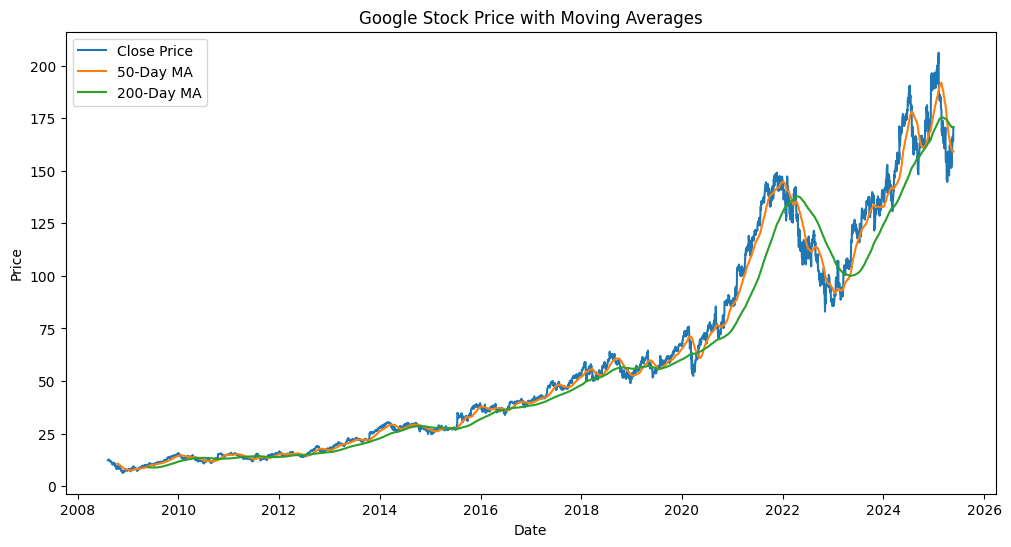

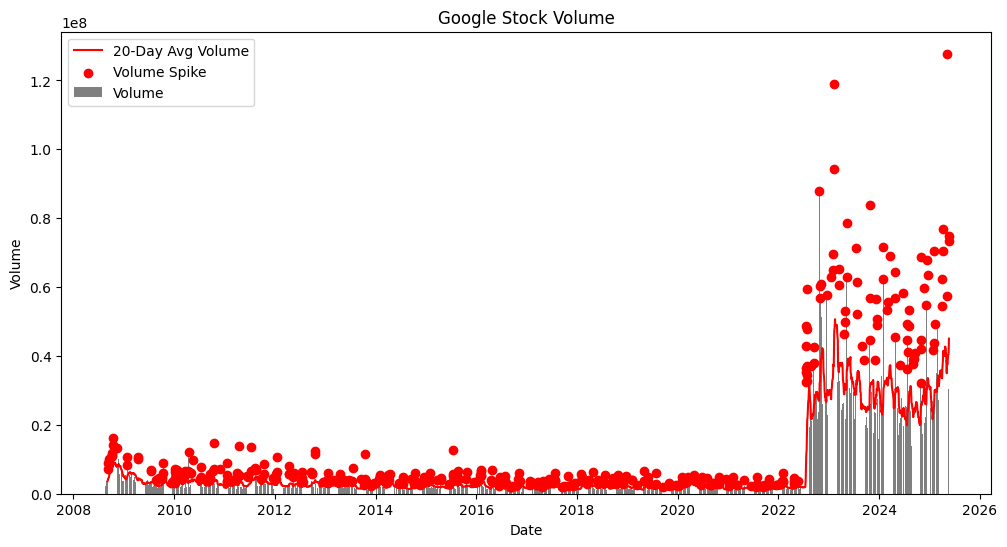

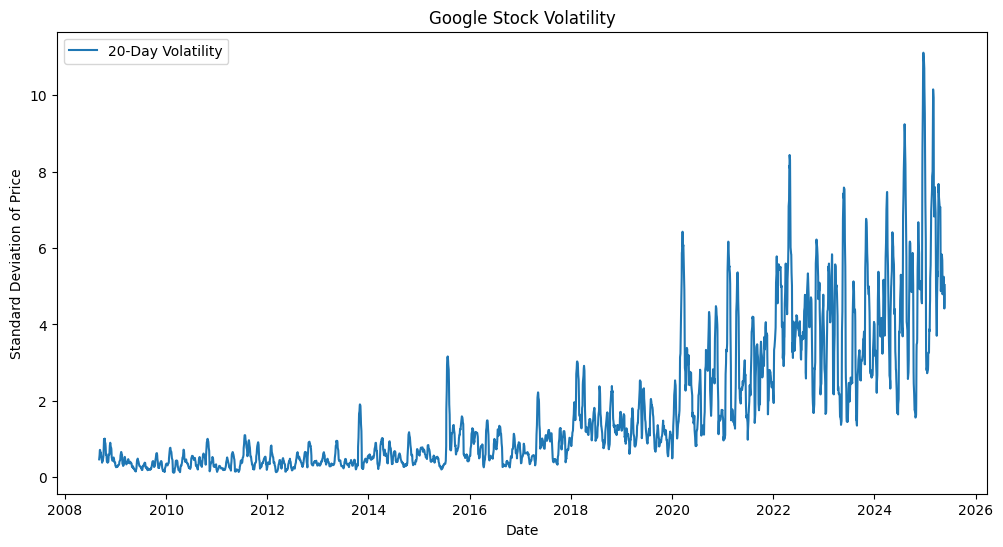

In [54]:
import matplotlib.pyplot as plt
# Correlation Analysis
correlation_coefficient = df['volume'].corr(df['close'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

# Moving Averages
df['50_day_MA'] = df['close'].rolling(window=50).mean()
df['200_day_MA'] = df['close'].rolling(window=200).mean()

# Volume Spikes - Identify days with volume significantly higher than the average
df['volume_mean'] = df['volume'].rolling(window=20).mean() # Using a 20-day rolling average for comparison
df['volume_spike'] = df['volume'] > (df['volume_mean'] * 1.5) # Example: Volume is 50% higher than the average

# Volatility Analysis
df['volatility'] = df['close'].rolling(window=20).std() # Using a 20-day rolling standard deviation

# Display some of the calculated descriptive analytics columns
print("\nDataFrame with Descriptive Analytics Columns:")
print(df[['close', 'volume', '50_day_MA', '200_day_MA', 'volume_spike', 'volatility']].tail())

# Optional: Plotting Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Close Price')
plt.plot(df['50_day_MA'], label='50-Day MA')
plt.plot(df['200_day_MA'], label='200-Day MA')
plt.title('Google Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Optional: Plotting Volume
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['volume'], label='Volume', color='gray')
plt.plot(df.index, df['volume_mean'], color='red', label='20-Day Avg Volume')
plt.scatter(df[df['volume_spike']].index, df[df['volume_spike']]['volume'], color='red', zorder=5, label='Volume Spike')
plt.title('Google Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Optional: Plotting Volatility
plt.figure(figsize=(12, 6))
plt.plot(df['volatility'], label='20-Day Volatility')
plt.title('Google Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Standard Deviation of Price')
plt.legend()
plt.show()


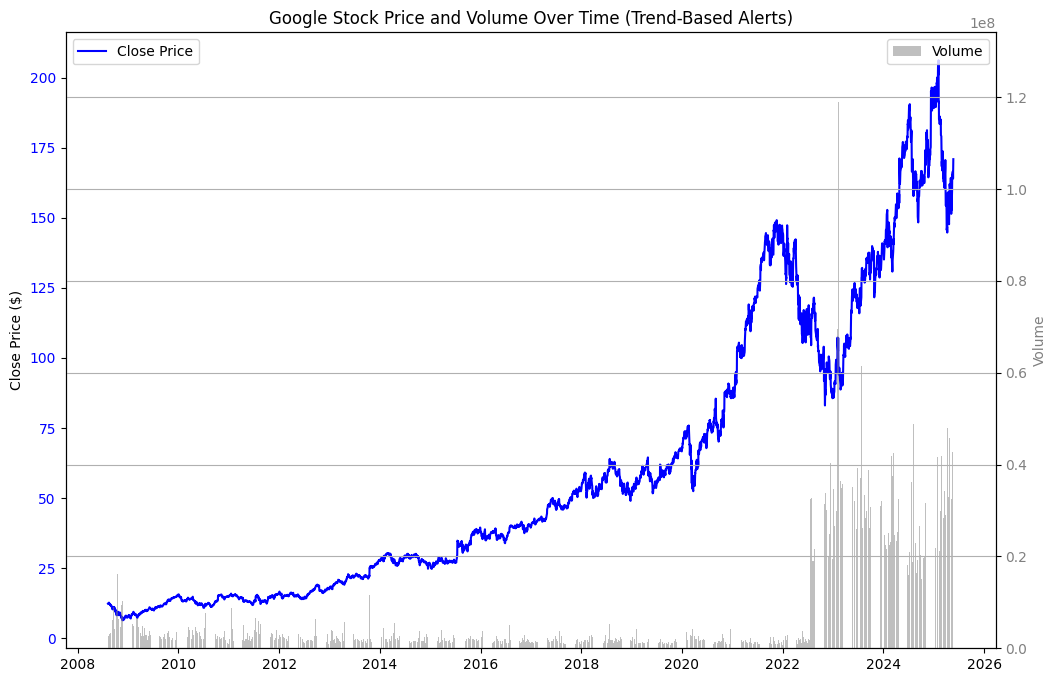

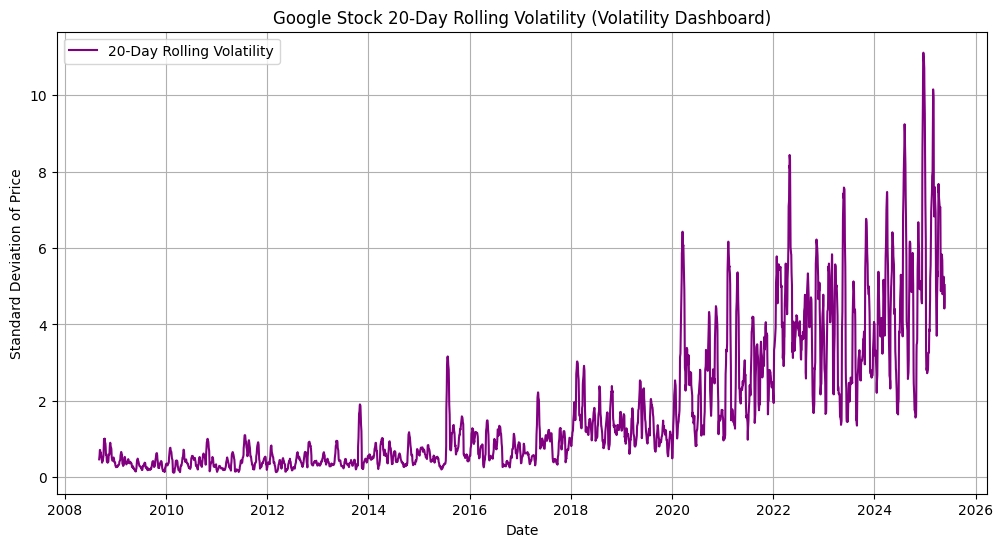

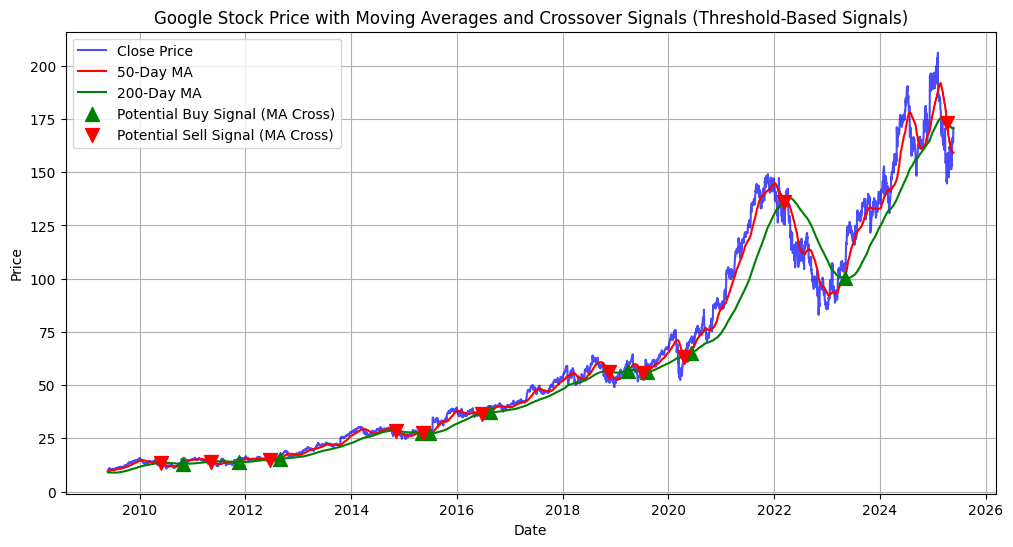

In [55]:
# •	Strategy 1 – Trend-Based Alerts:
# Utilize historical trends in price and volume to create automated alerts that notify users of potential market movements, such as bullish volume surges or downward breakouts.
# •	Strategy 2 – Volatility Dashboards:
# Developed real-time dashboards that visualize market volatility using rolling standard deviations. This helps traders assess risk levels before entering or exiting positions
# •	Strategy 3 – Automated Threshold-Based Signals:
# Implement rule-based systems that generate buy/sell recommendations when defined thresholds (e.g., moving average crossovers, volume anomalies) are met.
# guve graphs

import matplotlib.pyplot as plt
# Optional: Plotting Volume and Price together (Strategy 1 related visualization)
plt.figure(figsize=(12, 8))

# Plotting Close Price on primary y-axis
ax1 = plt.gca() # Get current axes
ax1.plot(df['close'], label='Close Price', color='blue')
ax1.set_ylabel('Close Price ($)')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Volume
ax2 = ax1.twinx()
ax2.bar(df.index, df['volume'], label='Volume', color='gray', alpha=0.5)
ax2.set_ylabel('Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.title('Google Stock Price and Volume Over Time (Trend-Based Alerts)')
plt.xlabel('Date')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()

# Optional: Plotting Rolling Volatility (Strategy 2 related visualization)
plt.figure(figsize=(12, 6))
plt.plot(df['volatility'], label='20-Day Rolling Volatility', color='purple')
plt.title('Google Stock 20-Day Rolling Volatility (Volatility Dashboard)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation of Price')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plotting Moving Average Crossovers (Strategy 3 related visualization example)
# This is a simplified example of a threshold-based signal visualization
df_plot = df.dropna() # Ensure no NaNs for plotting
plt.figure(figsize=(12, 6))
plt.plot(df_plot['close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(df_plot['50_day_MA'], label='50-Day MA', color='red')
plt.plot(df_plot['200_day_MA'], label='200-Day MA', color='green')

# Highlight potential buy signals (50-day MA crosses above 200-day MA) - Simplified
buy_signals = df_plot[(df_plot['50_day_MA'].shift(1) < df_plot['200_day_MA'].shift(1)) & (df_plot['50_day_MA'] > df_plot['200_day_MA'])]
plt.scatter(buy_signals.index, buy_signals['50_day_MA'], marker='^', color='green', s=100, label='Potential Buy Signal (MA Cross)', zorder=5)

# Highlight potential sell signals (50-day MA crosses below 200-day MA) - Simplified
sell_signals = df_plot[(df_plot['50_day_MA'].shift(1) > df_plot['200_day_MA'].shift(1)) & (df_plot['50_day_MA'] < df_plot['200_day_MA'])]
plt.scatter(sell_signals.index, sell_signals['50_day_MA'], marker='v', color='red', s=100, label='Potential Sell Signal (MA Cross)', zorder=5)


plt.title('Google Stock Price with Moving Averages and Crossover Signals (Threshold-Based Signals)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()